In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
accounts = pd.read_csv("accounts.csv") 
transactions = pd.read_csv("transactions.csv") 

In [3]:
accounts.dtypes

id_bank_account      int64
max_date            object
balance            float64
dtype: object

In [4]:
transactions.dtypes

id_bank_account      int64
date                object
amount             float64
category_l1         object
category_l2         object
dtype: object

In [5]:
# Convert the Date column to a datetime data type
transactions['date'] = pd.to_datetime(transactions['date'])
accounts['max_date'] = pd.to_datetime(accounts['max_date'])

In [6]:
transactions['category_l1'].unique()

array(['loan', nan, 'unindentifiedPayments', 'interPersonalTransfer',
       'brands', 'ATM', 'smallShops', 'telecom', 'personalTransfer',
       'incomes', 'energy', 'water', 'insurance', 'bankFees', 'savings',
       'gambling', 'taxes', 'overdraft', 'loanSuspicion', 'rejection',
       'rent', 'alimony', 'videoGames', 'fraud'], dtype=object)

In [7]:
transactions['category_l2'].unique()

array(['consumerCredit', nan, 'thirdParty', 'retail', 'hotel', 'check',
       'fastFood', 'Potentiel', 'IT', 'transport', 'cashDeposit', 'food',
       'servicePack', 'supermarket', 'Compte rémunéré', 'parking',
       'restaurant', 'CAF', 'videoStreaming', 'doctor', 'CPAM', 'Salaire',
       'Placement', 'mobile', 'sepaTransferFees ', 'Inconnu',
       'accountManagementFees', 'personInsurance', 'savings',
       'overdraftInterestReimbursement', 'barTobaccoPress', 'carWorkshop',
       'overdraftInterest', 'clothes', 'magazine', 'intervention',
       'propertyInsurance', 'splitPayment', 'pharmacy',
       'rejectionFeesReimbursement', 'Chômage', 'Livret A',
       'creditCardFees', 'musicStreaming', 'cardPaymentOutsideEU',
       'Assurance vie', 'creditCard', 'bailiff', 'rejectionFees',
       'mortgage', 'cinema', 'Taxe sur les transactions financières',
       'Timbre fiscal', 'microCredit', 'bookshop', 'Revenus', 'Loyers',
       'internet', 'Amende', 'Professionnel', 'withdraw

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "défaut de paiement"  </em> </strong> 

In [8]:
import datetime
def detect_defaut_paiement(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        default=transactions_compte[
        (transactions_compte["category_l1"]=="rejection")&
        (max(transactions_compte["date"]) - transactions_compte["date"] < datetime.timedelta(365))
    ]
    except:
        return -1
    nb_rejet=len(default)  
    if nb_rejet>=3:
        return 1
        
    return 0

In [9]:
defauts =[detect_defaut_paiement(compte) for compte in accounts['id_bank_account'] ]
accounts["Defaut_paiement"]=defauts

In [10]:
# Count the occurrences of each status
status_counts = accounts["Defaut_paiement"].value_counts()

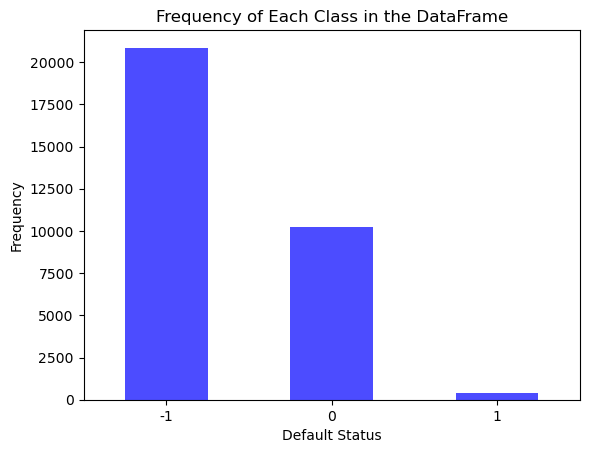

In [11]:
import matplotlib.pyplot as plt

# Plotting the counts
status_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Default Status')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in the DataFrame')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for readability
plt.show()

In [12]:
accounts[accounts["Defaut_paiement"]==1]

,id_bank_account,max_date,balance,Defaut_paiement
60,1983,2023-05-18 22:00:00,535.85,1
118,2181,2023-08-21 22:00:00,-135.55,1
150,2259,2022-05-19 22:00:00,-6527.13,1
151,2260,2022-05-23 22:00:00,-822.43,1
157,2268,2022-05-23 22:00:00,-822.43,1
...,...,...,...,...
31153,69543,2024-02-29 23:00:00,-506.23,1
31154,69544,2024-02-28 23:00:00,-12.90,1
31168,69559,2024-02-26 23:00:00,286.00,1
31207,69608,2024-02-29 23:00:00,571.04,1


<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "nbre de rejection passée les 3 mois précédents"  </em> </strong> 

In [13]:
def past_rejection(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[
            (transactions_compte['date']>(max(transactions_compte['date'])- datetime.timedelta(90)))]
    except:
        return 0
        
    return len(df[df['category_l1']=='rejection'])
       

In [14]:
n_rejet =[past_rejection(compte) for compte in accounts['id_bank_account'] ]
accounts["n_rejection"]=n_rejet

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "Le montant total de rejection passée les 3 mois précédents"  </em> </strong> 

In [15]:
def total_amount_rejection(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[
            (transactions_compte['date']>(max(transactions_compte['date'])- datetime.timedelta(90)))]
    except:
        return 0
        
    return sum(df[df['category_l1']=='rejection']['amount'])
       

In [16]:
sum_rejet =[total_amount_rejection(compte) for compte in accounts['id_bank_account'] ]
accounts["sum_rejection"]=sum_rejet

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "Temps écoulé depuis la dernière rejection"  </em> </strong> 

In [17]:
def temps_rejection(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[transactions_compte["category_l1"]=="rejection"]
        return max(transactions_compte['date'])-max(df['date'])
    except:
        return 0
        

In [18]:
temps =[temps_rejection(compte) for compte in accounts['id_bank_account'] ]
accounts["Time_last_rejection"]=temps

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "evolution du solde sur les derniers 3 mois"  </em> </strong> 

In [19]:
def evolution(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[
            (transactions_compte['date']>(max(transactions_compte['date'])- datetime.timedelta(90)))]
    except:
        return 0
    account=accounts[accounts['id_bank_account']==compte]
    solde_ini=account['balance'].iloc[0]
    for trans in df['amount']:
        solde_ini-=trans
    return account['balance'].iloc[0]-solde_ini
    
    

In [20]:
accounts["account_evolution"] =[evolution(compte) for compte in accounts['id_bank_account'] ]

In [21]:
# Fonction pour vérifier si deux dates ont plus de 12 mois d'écart
def moins_de_12_mois_ecart(date1, date2):
    # Calcul de la différence en mois
    difference_mois = (date2.year - date1.year) * 12 + date2.month - date1.month
    
    # Vérification si la différence est supérieure à 12 mois
    return difference_mois < 12

<code style="background:LightBlue;color:white"> <strong><em> K-Nearest Neighbors  </em> </strong> 

In [22]:
df = accounts.drop(accounts[accounts['Defaut_paiement'] == -1].index)

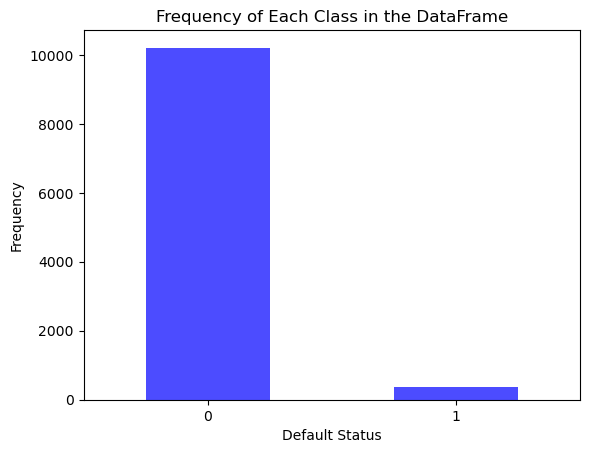

In [23]:
# Count the occurrences of each status
status_counts = df["Defaut_paiement"].value_counts()
import matplotlib.pyplot as plt

# Plotting the counts
status_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Default Status')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in the DataFrame')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for readability
plt.show()

In [24]:
# Convertir les Timedelta en nombre de jours
try:
    df['Days_since_last_rejection'] = df['Time_last_rejection'].dt.days
except:
    df['Days_since_last_rejection'] =0
    
# Convertir en type de données entier si nécessaire
df['Days_since_last_rejection'] = df['Days_since_last_rejection'].astype(int)

In [25]:
df["Defaut_paiement"] = df["Defaut_paiement"].astype('category')

In [26]:
X=df[['n_rejection', 'sum_rejection','Days_since_last_rejection','account_evolution']]
y=df["Defaut_paiement"]

In [27]:
from sklearn.utils import shuffle 
X, y = shuffle(X,y)

In [28]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.score( X_test, y_test)

0.9863894139886579

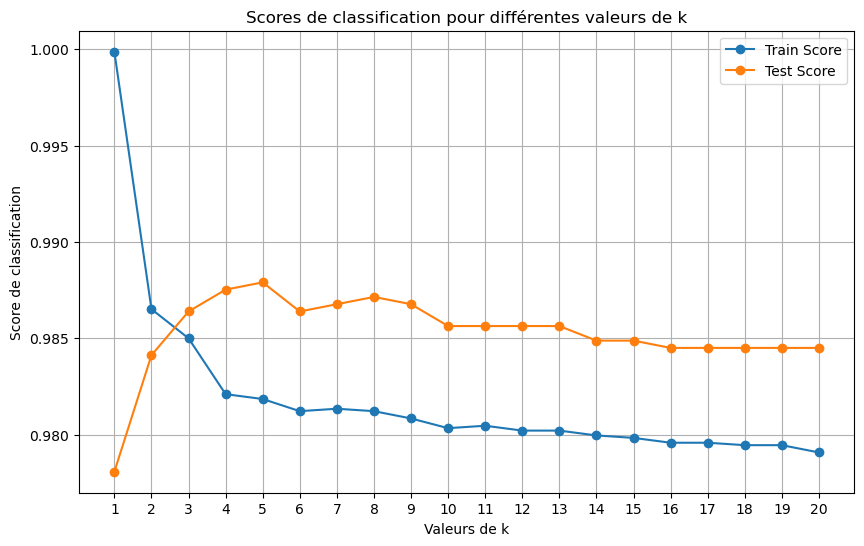

La meilleure valeur de k est : 5


In [38]:
# Définir une liste des valeurs de k à tester
k_values = range(1, 21)
from sklearn.metrics import accuracy_score
# Initialiser des listes pour stocker les scores d'apprentissage et de test
train_scores = []
test_scores = []
# Boucler sur les valeurs de k
for k in k_values:
    # Créer et entraîner le modèle kNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Prédire sur l'ensemble d'apprentissage et calculer le score
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    # Prédire sur l'ensemble de test et calculer le score
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Tracer les courbes des scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Score', marker='o')
plt.plot(k_values, test_scores, label='Test Score', marker='o')
plt.title('Scores de classification pour différentes valeurs de k')
plt.xlabel('Valeurs de k')
plt.ylabel('Score de classification')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Trouver la meilleure valeur de k
best_k = k_values[np.argmax(test_scores)]
print("La meilleure valeur de k est :", best_k)